In [44]:
'''packages for data analysis'''

import pandas as pd
import numpy as np
from sklearn import svm

In [45]:
''' packages for visuals '''

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)

In [46]:
''' allows charts to appear in the notebook '''
%matplotlib inline

In [47]:
''' pickel package'''
import pickle

In [48]:
recipes=pd.read_csv('C:\\Users\\hp\\Downloads\\machine learning folder\\Cupcakes vs Muffins.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [49]:
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


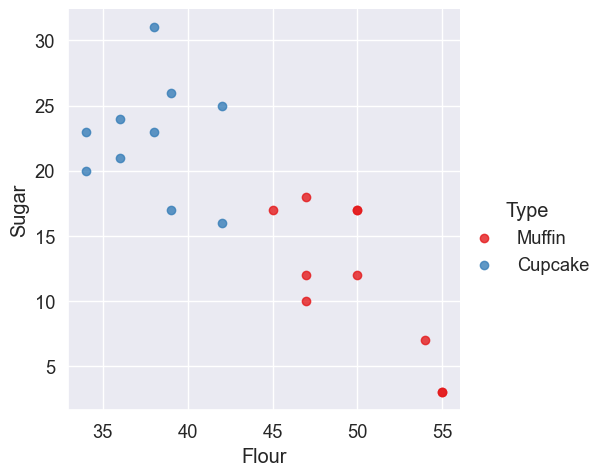

In [50]:
''' plot our data (sugar & flour) '''
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter=True)  

In [61]:
''' pre_process ou data ,the computer doesn't know weather its a muffin or cupcmake'''
type_label=np.where(recipes['Type']=='Muffin',0,1)
recipe_features=recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [69]:
ingredients=recipes[['Flour','Sugar']].values
#ingredients

In [73]:
''' fit model'''
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [71]:
''' get the separating hyperplane '''
w=model.coef_[0]
print(w)
a=-w[0]/w[1]
print(a)
xx=np.linspace(30,40)
print(xx)

[-6.66503014e-01 -7.77156117e-16]
-857617921181270.0
[30.         30.20408163 30.40816327 30.6122449  30.81632653 31.02040816
 31.2244898  31.42857143 31.63265306 31.83673469 32.04081633 32.24489796
 32.44897959 32.65306122 32.85714286 33.06122449 33.26530612 33.46938776
 33.67346939 33.87755102 34.08163265 34.28571429 34.48979592 34.69387755
 34.89795918 35.10204082 35.30612245 35.51020408 35.71428571 35.91836735
 36.12244898 36.32653061 36.53061224 36.73469388 36.93877551 37.14285714
 37.34693878 37.55102041 37.75510204 37.95918367 38.16326531 38.36734694
 38.57142857 38.7755102  38.97959184 39.18367347 39.3877551  39.59183673
 39.79591837 40.        ]


In [75]:
yy=a*xx-(model.intercept_[0]/w[1])

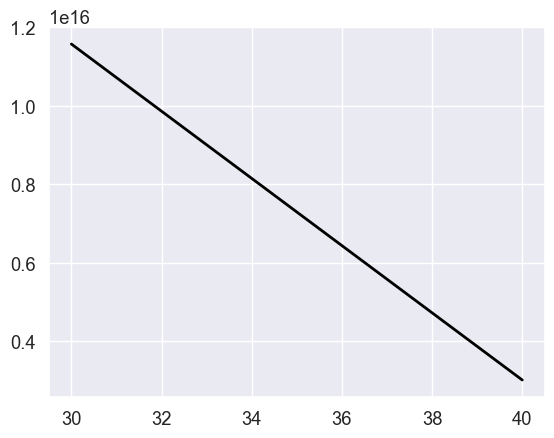

In [79]:
plt.plot(xx,yy,linewidth=2,color='black')

In [85]:
''' plot the parallels to the separating hyperplane that pass through the sepport vector'''

b=model.support_vectors_[0]
print(b)
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
print(b)
yy_up=a*xx+(b[1]-a*b[0])

[45. 17.]
[42. 25.]


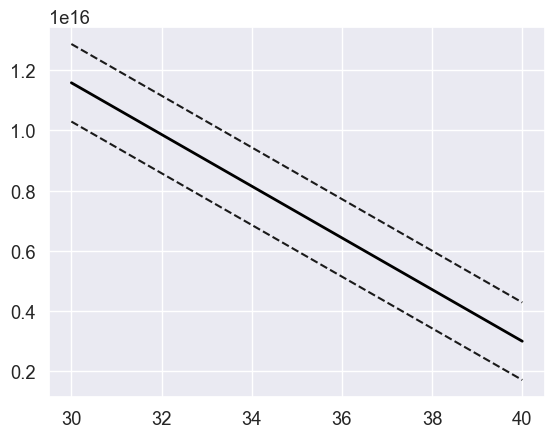

In [89]:
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [93]:
''' cteate a function to predict muffin or cupcake '''

def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('you are looking at a muffin recipe')
    else:
        print('you are looking at a cupcake recipe')

In [99]:
# predict what it is given quanties
muffin_or_cupcake(30,40)

you are looking at a cupcake recipe


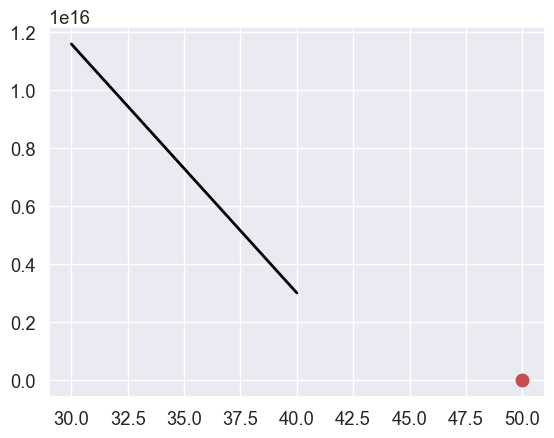

In [103]:
''' plot using a graph'''
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(50,40,'ro',markersize='9');